In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import MarkerCluster



In [2]:
df = pd.read_csv("1900-01-01-2020-11-30-Ethiopia.csv")

# clean time series
df["event_date"] = pd.to_datetime(df["event_date"])
df["month"] = df["event_date"].dt.month
df["year"] = df["event_date"].dt.year
df["day"] = df["event_date"].dt.day

df

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,month,day
0,7307058,231,ETH5758,5758,2020-11-21,2020,2,Battles,Government regains territory,Military Forces of Ethiopia (2018-),...,39.4620,1,Ethiopia State of Emergency Fact Check,New media,"Around 21 November 2020, ENDF forces took cont...",0,1606158328,ETH,11,21
1,7307056,231,ETH5754,5754,2020-11-20,2020,2,Battles,Government regains territory,Military Forces of Ethiopia (2018-),...,38.8992,1,Ethiopia State of Emergency Fact Check,New media,"Around 20 November 2020, ENDF forces took cont...",0,1606158328,ETH,11,20
2,7307057,231,ETH5755,5755,2020-11-20,2020,2,Battles,Government regains territory,Military Forces of Ethiopia (2018-),...,38.7313,1,Ethiopia State of Emergency Fact Check,New media,"Around 20 November 2020, ENDF forces took cont...",0,1606158328,ETH,11,20
3,7307403,231,ETH5757,5757,2020-11-20,2020,1,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromia State...,...,36.8333,1,Oromiya Media Network,International,"On 20 November 2020, police forces entered the...",1,1606158330,ETH,11,20
4,7307451,231,ETH5756,5756,2020-11-20,2020,1,Explosions/Remote violence,Shelling/artillery/missile attack,TPLF: Tigray Peoples Liberation Front,...,37.3833,1,Reuters,International,"On 20 November 2020, TPLF forces fired two roc...",0,1606158330,ETH,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,6875884,231,ETH5,5,1997-03-30,1997,1,Protests,Peaceful protest,Protesters (Ethiopia),...,38.7000,1,All Africa,Regional,Opposition groups stage protest over land redi...,0,1582579225,ETH,3,30
5632,6875901,231,ETH4,4,1997-03-21,1997,1,Protests,Excessive force against protesters,Police Forces of Ethiopia (1995-2018),...,38.7000,1,All Africa,Regional,Students stage demonstration; security forces ...,0,1582579225,ETH,3,21
5633,6974348,231,ETH3,3,1997-02-15,1997,3,Strategic developments,Headquarters or base established,SPLM/A: Sudan People's Liberation Movement/Army,...,34.5833,1,All Africa,Regional,SPLA maintain office and base in Gambella,0,1583194169,ETH,2,15
5634,6875972,231,ETH2,2,1997-02-10,1997,1,Explosions/Remote violence,Grenade,Unidentified Armed Group (Ethiopia),...,42.1167,1,Reuters,International,Grenade attack by unknown attackers wounds for...,2,1582579225,ETH,2,10


In [3]:
# playing around...

# df.head(8) # print first 8 rows
# df.tail(10) # print last 10 rows

# subset pandas
event_type = df['event_type']
print(type(event_type)) # Each column in a DataFrame is a Series, event_type is an object of class Series

print(len(df)) # number of rows
print(df.shape) # rows then columns
print(df.size) # rows times columns
print(type(df)) # pandas.core.frame.DataFrame


<class 'pandas.core.series.Series'>
5636
(5636, 33)
185988
<class 'pandas.core.frame.DataFrame'>


In [4]:


#Define coordinates of where we want to center our map
tigray_coords = [7, 39]

#Create the map
my_map = folium.Map(location = tigray_coords, zoom_start = 5)

subset = df
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        coords = [yvals[j], xvals[j]]
        folium.CircleMarker(coords, radius=0.5,
                           color='gray',fill=True, fill_opacity=0.1).add_to(my_map)

subset = df[(df['year'] == 2020) & (df['month'] >= 11)] # Nov 2020 onward
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        coords = [yvals[j], xvals[j]]
        folium.CircleMarker(coords, radius=3,
                           color='darkred',fill=True, fill_opacity=4).add_to(my_map)
        
#Display the map
my_map


In [5]:


#Define coordinates of where we want to center our map
tigray_coords = [7, 39]

#Create the map
my_map = folium.Map(location = tigray_coords, zoom_start = 5)

subset = df[(df['year'] == 2020)] # 2020
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        coords = [yvals[j], xvals[j]]
        folium.CircleMarker(coords, radius=3,
                           color='gray',fill=True, fill_opacity=4).add_to(my_map)
        
subset = df[(df['year'] == 2020) & (df['month'] >= 11)] # Nov 2020 onward
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        coords = [yvals[j], xvals[j]]
        folium.CircleMarker(coords, radius=3,
                           color='darkred',fill=True, fill_opacity=4).add_to(my_map)
        
#Display the map
my_map
        
#Display the map
my_map


In [6]:


#Define coordinates of where we want to center our map
tigray_coords = [7, 39]

#Create the map
my_map = folium.Map(location = tigray_coords, zoom_start = 5)

subset = df[(df['year'] == 2020)] # 2020
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        coords = [yvals[j], xvals[j]]
        folium.CircleMarker(coords, radius=3,
                           color='gray',fill=True, fill_opacity=4).add_to(my_map)
        
#Display the map
my_map


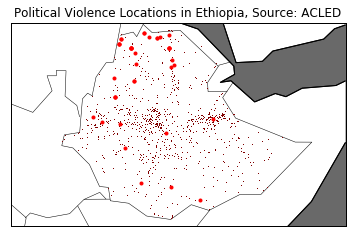

In [7]:


m = Basemap(projection='merc',llcrnrlat=3,urcrnrlat=15,\
            llcrnrlon=30,urcrnrlon=50,lat_ts=20,resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='dimgray')
m.drawmapboundary(fill_color='dimgray')

# plot political violence locations
#subset = df[(df['year'] == 2020) & (df['month'] >= 6)] # Jun 2020 onward
#subset = df[(df['year'] == 2020) & (df['month'] >= 10)] # Oct 2020 onward
#subset = df[(df['year'] == 2020) & (df['month'] >= 11)] # Nov 2020 onward

subset = df
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        x, y = m(xvals[j], yvals[j]) # lons, lats
        m.plot(x,y, marker=',', ls=' ', c='maroon')

subset = df[(df['year'] == 2020) & (df['month'] >= 11)] # Nov 2020 onward
event_types = list(subset['event_type'].unique())

for i in event_types:
    xvals = list(subset.loc[subset['event_type'] == i, 'longitude'])
    yvals = list(subset.loc[subset['event_type'] == i, 'latitude'])
    
    for j in range(0, len(xvals)):
        x, y = m(xvals[j], yvals[j]) # lons, lats
        m.plot(x,y, marker='.', ls=' ', c='r')

plt.title('Political Violence Locations in Ethiopia, Source: ACLED')
plt.show()
        

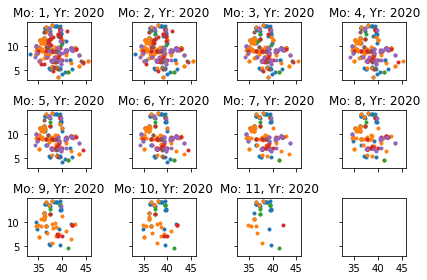

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4,
                         sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.4, wspace=.3)
month = 1
for i in range(3):
    for j in range(4):

        subset = df[(df['year'] == 2020) & (df['month'] >= month)] # Nov 2020 onward
        event_types = list(subset['event_type'].unique())
        
        for k in event_types:
            axes[i, j].plot(subset.loc[subset['event_type'] == k, 'longitude'],
                            subset.loc[subset['event_type'] == k, 'latitude'],
                            label = k,
                            marker='.', ls=' ')
            axes[i, j].set_title('Mo: {:d}'.format(month)+', Yr: 2020')
        month += 1

fig.tight_layout()
plt.show()


In [9]:
# plot violence events from Nov 2020 onward (Tigray violence)
# for i in event_types:
#     plt.plot(subset.loc[subset['event_type'] == i, 'longitude'],
#              subset.loc[subset['event_type'] == i, 'latitude'], marker='.', ls=' ')

# plt.xlabel('longitude')
# plt.ylabel('latitude')
# plt.title('Political Violence Locations in Ethiopia, Source: ACLED')
# plt.legend(event_types, loc='upper left')
# plt.show()